#  Atividade prática aula 03 <h1>
    Aluno: Kristtopher Kayo Coelho
    Matrícula: ES95031

A atividade de consiste em coletar dados de sites utilizando alguma técnica de "raspagem", e apresentá-los como por meio de uma função, 
seja CDF ou PMF.
A técnica escolhida foi o Scraping, sua implementação foi realizada baseando no exemplo dos slides da aula 3.
O site utilizado para realizar a coleta de dados é o https://webscraper.io/, ideal para desenvolver o conhecimento das técnicas de Scraping. Neste site, foi escolhida a classe de e-commerce para a captura dos dados. Os preços e modelos de notebooks foram considerados nesta atividade. Para representar os dados de forma gráfica, optou-se por utilizar a CDF.

O bloco abaixo contém as bibliotecas necessárias para executar os demais blocos

In [24]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


A baixo é descrito o código de captura dos dados referente ao modelo e preço dos notebooks.

In [25]:
url = "https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops"
html = urlopen(url)
soup = BeautifulSoup(html,features="html.parser")

row = soup.find_all('div', class_ = 'row')
caption = row[1].find_all(class_ = 'caption')

notebooks = []
str_price = []
price = []

for elemen in caption:
    notebooks.append(elemen.find('a').get_text())
    str_price.append(elemen.find('h4').get_text())

A figura abaixo representa os dados amostrados após a limpeza e processamento da página.


![Dados coletados](out.png)

Em seguida os valores são apresentados no formato de uma CDF

(-0.01, 1.01)

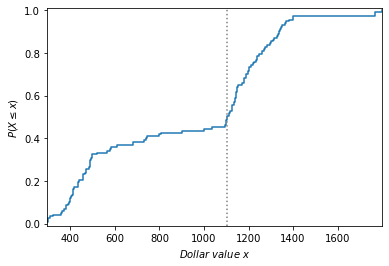

In [26]:
for p in str_price:
    price.append(float (p.replace('$','')))

x = np.sort(price)
ecdf = sm.distributions.ECDF(price)
y = ecdf(x)

plt.step(x, y, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel(r'$Dollar~value~x$')
plt.xlim(min(x)-0.05, max(x)+0.05)
plt.axvline(x=1101.83,ls=':', color = 'gray', label='1101.83')
plt.ylim(0-0.01, 1+0.01)

Através da CDF conclui-se que 48% dos notebooks da amostra obtida possuem preço menor ou igual a 1099.00 dolares.